# Player/Ball Detection

This notebook contains code to visualize results of the player/ball detector models. We first look at some examples from the tracklet frames:

In [1]:
import os
import cv2
import matplotlib.pyplot as plt

In [2]:
def convert_yolo_coordinates_to_voc(x_c_n, y_c_n, width_n, height_n, img_width, img_height):
  ## remove normalization given the size of the image
  x_c = float(x_c_n) * img_width
  y_c = float(y_c_n) * img_height
  width = float(width_n) * img_width
  height = float(height_n) * img_height
  ## compute half width and half height
  half_width = width / 2
  half_height = height / 2
  ## compute left, top, right, bottom
  left = int(x_c - half_width) + 1
  top = int(y_c - half_height) + 1
  right = int(x_c + half_width) + 1
  bottom = int(y_c + half_height) + 1
  return left, top, right, bottom

In [3]:
def drawGT(frame, classId, left, top, right, bottom):
    # Draw a bounding box.
    frame_gt = frame
    cv2.rectangle(frame_gt, (left, top), (right, bottom), (255, 178, 50), 3)
        
    # Get the label for the class name and its confidence
    label = '%s' % (classId)

    #Display the label at the top of the bounding box
    labelSize, baseLine = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)
    top = max(top, labelSize[1])
    frame_gt = cv2.rectangle(frame_gt, (left, int(top - round(1.5*labelSize[1]))), (left + int(round(1.5*labelSize[0])), top + baseLine), (255, 255, 255), cv2.FILLED)
    frame_gt = cv2.putText(frame_gt, label, (left, top), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0,0,0), 1)
    return frame_gt

In [4]:
IMAGE_PATH = './downloads/trackletframes-2.5k/images/train'
LABEL_PATH = './downloads/trackletframes-2.5k/labels/train'

In [5]:
images, gt_labels = [], []
for img_name in os.listdir(IMAGE_PATH):
    img_base_name = img_name.replace('.jpg', '')
    label_name = img_base_name + '.txt'
    images.append(os.path.join(IMAGE_PATH, img_name))
    gt_labels.append(os.path.join(LABEL_PATH, label_name))

#print(images)
#print(gt_labels)

In [6]:
len(images), len(gt_labels)

(2000, 2000)

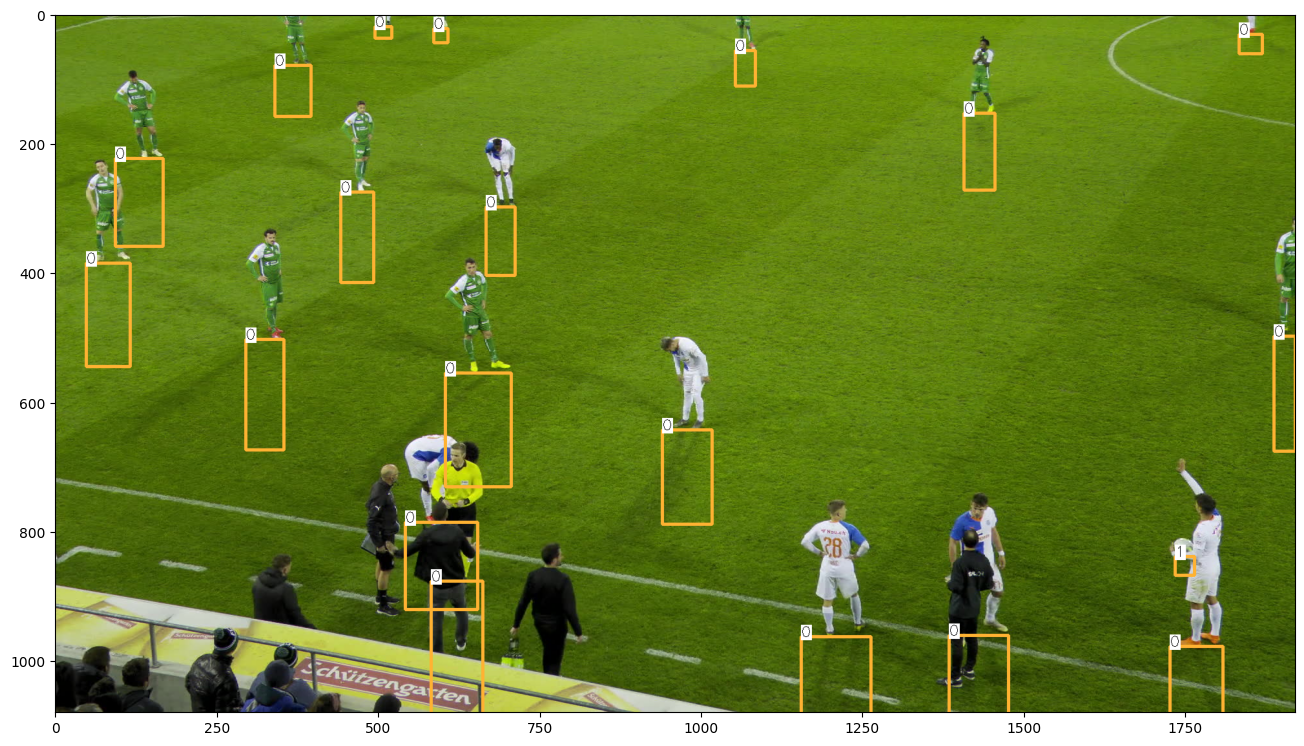

In [7]:
fig, ax = plt.subplots(figsize=(16, 14))
i = images.index('./downloads/trackletframes-2.5k/images/train/SNMOT-077_000042.jpg')
img = images[i]
frame = cv2.imread(img)
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
with open(gt_labels[i], 'r') as f:
    lines = f.readlines()
    for line in lines:
        cls, x_c_n, y_c_n, w_n, h_n = line.split()
        l, t, r, b = convert_yolo_coordinates_to_voc(x_c_n, y_c_n, w_n, h_n, 1920, 1080)
        frame = drawGT(frame, cls, l, t, r, b)
ax.imshow(frame)
            